In [31]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
import io
import pandas as pd
from google.colab import files

In [49]:
uploaded = files.upload()

Saving DOB_Complaints_Received_Reduced.csv to DOB_Complaints_Received_Reduced (2).csv


In [50]:
Data = pd.read_csv(io.BytesIO(uploaded.get('DOB_Complaints_Received_Reduced.csv')))

In [51]:
Data["DateTime Entered"] = pd.to_datetime(Data["Date Entered"])

In [52]:
Data17 = Data[Data['DateTime Entered'] < '2017-12-31']
Data17 = Data[Data['DateTime Entered'] > '2017-01-01']

Data18 = Data[Data['DateTime Entered'] < '2018-12-31']
Data18 = Data[Data['DateTime Entered'] > '2018-01-01']

Data19 = Data[Data['DateTime Entered'] < '2019-12-31']
Data19 = Data[Data['DateTime Entered'] > '2019-01-01']

Data20 = Data[Data['DateTime Entered'] < '2020-12-31']
Data20 = Data[Data['DateTime Entered'] > '2020-01-01']

Data21 = Data[Data['DateTime Entered'] > '2021-01-01']

In [54]:
Data17Zipcode = Data17.groupby(['ZIP Code']).agg({'Complaint Number':'count'}).reset_index()
Data18Zipcode = Data18.groupby(['ZIP Code']).agg({'Complaint Number':'count'}).reset_index()
Data19Zipcode = Data19.groupby(['ZIP Code']).agg({'Complaint Number':'count'}).reset_index()
Data20Zipcode = Data20.groupby(['ZIP Code']).agg({'Complaint Number':'count'}).reset_index()
Data21Zipcode = Data21.groupby(['ZIP Code']).agg({'Complaint Number':'count'}).reset_index()

In [55]:
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

import os 
import seaborn as sns #for styling the plots
import statsmodels.formula.api as smf
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline 

In [57]:
if not os.path.exists('Data'):
    !mkdir Data
if not os.path.exists('Data/RollingSale'):
    !mkdir Data/RollingSale

In [58]:
# download zipcode map
url = 'https://github.com/CUSP2020PUI/Data/raw/master/ZIPCODE.zip'
urllib.request.urlretrieve(url,'Data/ZIPCODE.zip')

('Data/ZIPCODE.zip', <http.client.HTTPMessage at 0x7f811d3e0ca0>)

In [59]:
#it comes in the zip archive, so use zipfile module to extract it
import zipfile
with zipfile.ZipFile('Data/ZIPCODE.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/ZIPCODE')

In [60]:
#load the resulting shapefile using geopandas 
zipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [61]:
# Convert it to numeric (int)
zipcode['ZIP Code'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIP Code'].unique()

In [64]:
# Finding the rate of change of each period
Data17Zipcode['17_18'] = Data18Zipcode['Complaint Number'] - Data17Zipcode['Complaint Number']
Data17Zipcode['18_19'] = Data19Zipcode['Complaint Number'] - Data18Zipcode['Complaint Number'] # Baseline
Data17Zipcode['19_20'] = Data20Zipcode['Complaint Number'] - Data19Zipcode['Complaint Number']
Data17Zipcode['Base_20'] = Data17Zipcode['18_19'] - Data20Zipcode['Complaint Number']
Data17Zipcode['Base_21'] = Data17Zipcode['18_19'] - Data21Zipcode['Complaint Number']

# Change header name to make more understanidng
Data17Zipcode.rename(columns = {'Complaint Number':'Complaint Count'}, inplace = True)

Data17Zipcode.head()

,ZIP Code,Complaint Count,17_18,18_19,19_20,Base_20,Base_21
0,,16,-4,-3.0,-6.0,-6.0,-653.0
1,10001,2471,-381,-445.0,-491.0,-1599.0,-1096.0
2,10002,2685,-431,-539.0,-523.0,-1731.0,-1208.0
3,10003,2600,-421,-539.0,-451.0,-1728.0,-600.0
4,10004,209,-30,-27.0,-40.0,-139.0,-84.0


In [67]:
#merge price data with the zip code shapes into a new geopandas dataframe
ComplaintGeo = zipcode.merge(Data17Zipcode,left_on='ZIPCODE',right_on='ZIP Code',how='left')
ComplaintGeo.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,SHAPE_LEN,geometry,ZIP Code_x,ZIP Code_y,Complaint Count,17_18,18_19,19_20,Base_20,Base_21
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11436,11436,779.0,-111.0,202.0,-795.0,127.0,NaN
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",11213,11213,2371.0,-324.0,-391.0,-614.0,-1433.0,-1112.0
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",11212,11212,1959.0,-294.0,-62.0,-762.0,-903.0,-736.0
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",11225,11225,2371.0,-285.0,644.0,-1961.0,-125.0,91.0
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",11218,11218,2266.0,-333.0,-192.0,-714.0,-1219.0,-1008.0


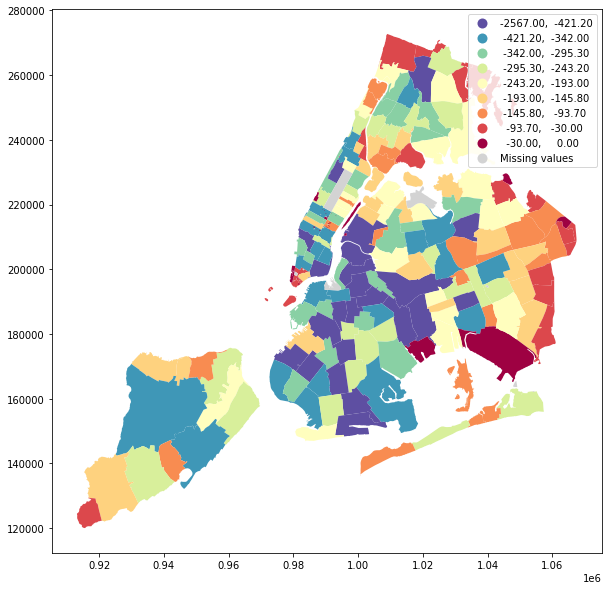

In [71]:
#plot the spatial distribution of 17_18
ComplaintGeo.plot(column='17_18',colormap='Spectral_r', k=10, scheme = 'Quantiles',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                
                "hatch": "",
                "label": "Missing values",
                },)

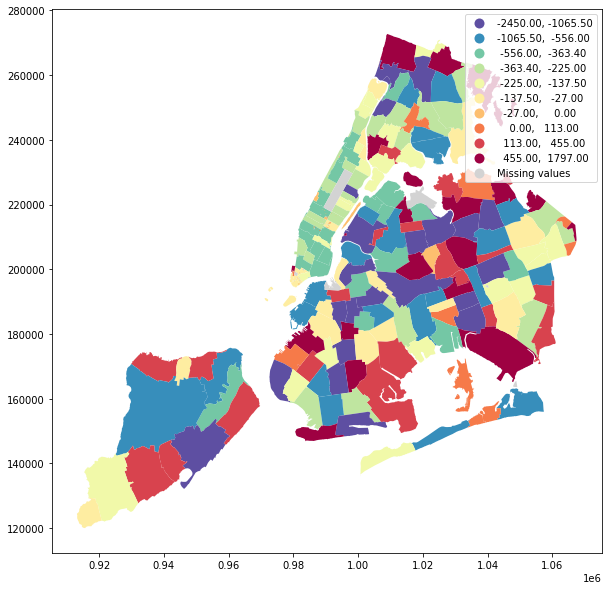

In [70]:
#plot the spatial distribution of 18_19
ComplaintGeo.plot(column='18_19',colormap='Spectral_r', k=10, scheme = 'Quantiles',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                
                "hatch": "",
                "label": "Missing values",
                },)

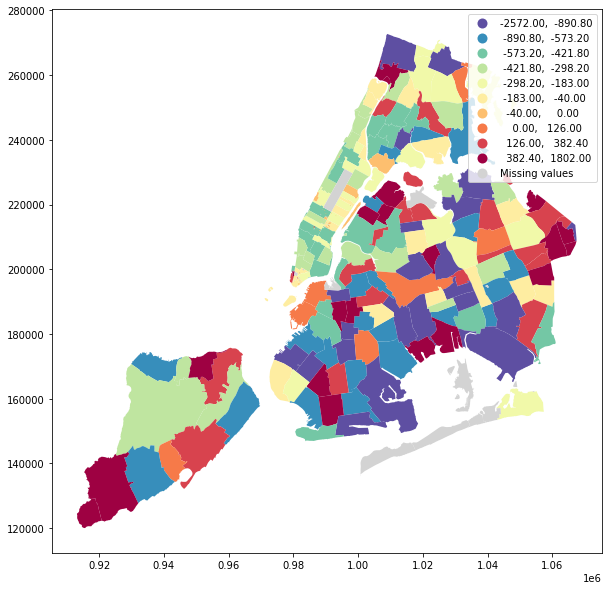

In [72]:
#plot the spatial distribution of 19_20
ComplaintGeo.plot(column='19_20',colormap='Spectral_r', k=10, scheme = 'Quantiles',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                
                "hatch": "",
                "label": "Missing values",
                },)

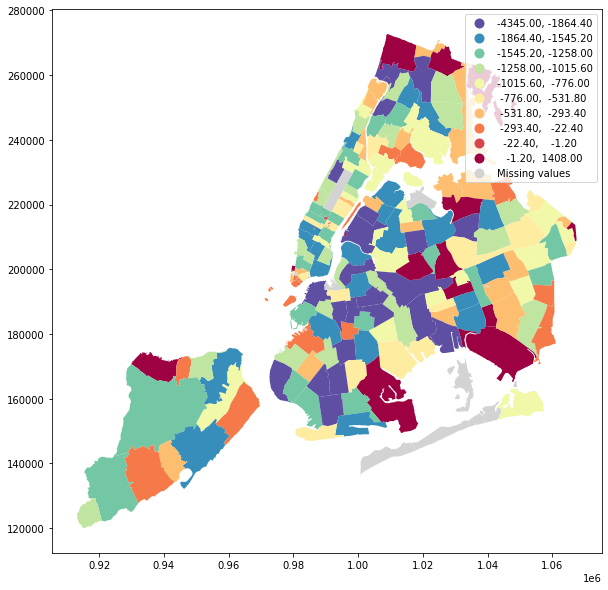

In [73]:
#plot the spatial distribution of Base_20
ComplaintGeo.plot(column='Base_20',colormap='Spectral_r', k=10, scheme = 'Quantiles',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                
                "hatch": "",
                "label": "Missing values",
                },)

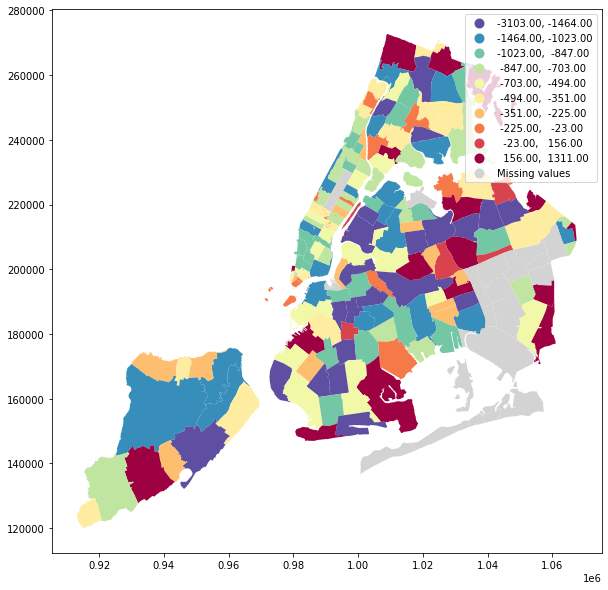

In [74]:
#plot the spatial distribution of Base_21
ComplaintGeo.plot(column='Base_21',colormap='Spectral_r', k=10, scheme = 'Quantiles',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                
                "hatch": "",
                "label": "Missing values",
                },)
